In [10]:
from transformers import pipeline
from goose3 import Goose
import spacy
import nltk
import en_core_web_sm
import matplotlib.pyplot as plt
from spacy import displacy
from wordcloud import WordCloud

In [11]:
summarizor = pipeline('summarization',model = 'facebook/bart-large-cnn')

In [14]:
len(summarizor.tokenizer.tokenize(article.cleaned_text))

981

In [15]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(article.cleaned_text)
sentences = nltk.tokenize.sent_tokenize(article.cleaned_text)
sentences
s = ' '.join(sentences)
s

'Human resource management (HRM) is the practice of recruiting, hiring, deploying and managing an organization\'s employees. HRM is often referred to simply as human resources (HR). A company or organization\'s HR department is usually responsible for creating, putting into effect and overseeing policies governing workers and the relationship of the organization with its employees. The term human resources was first used in the early 1900s, and then more widely in the 1960s, to describe the people who work for the organization, in aggregate. HRM is employee management with an emphasis on those employees as assets of the business. In this context, employees are sometimes referred to as human capital. As with other business assets, the goal is to make effective use of employees, reducing risk and maximizing return on investment (ROI). The modern HR technology term human capital management (HCM) has been used more frequently compared to the term HRM. The term HCM has had widespread adopti

In [16]:
z1 = summarizor(article.cleaned_text,max_length=100, min_length=50, do_sample=False)

In [17]:
type(z1[0]['summary_text'])

str

In [23]:
set1 = nltk.tokenize.sent_tokenize(z1[0]['summary_text'])
set1
for i in set1:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>


In [50]:
nlp = spacy.load('en_core_web_sm')

In [51]:
len(article.cleaned_text)

5455

In [52]:
len(nlp(article.cleaned_text))

949

In [13]:
g = Goose()
article = g.extract("https://searchhrsoftware.techtarget.com/definition/human-resource-management-HRM")

In [17]:
len(article.cleaned_text)

5455

In [18]:
nlp = spacy.load('en_core_web_sm')

In [19]:
document = nlp(article.cleaned_text)

In [21]:
article.cleaned_text

'Human resource management (HRM) is the practice of recruiting, hiring, deploying and managing an organization\'s employees. HRM is often referred to simply as human resources (HR). A company or organization\'s HR department is usually responsible for creating, putting into effect and overseeing policies governing workers and the relationship of the organization with its employees. The term human resources was first used in the early 1900s, and then more widely in the 1960s, to describe the people who work for the organization, in aggregate.\n\nHRM is employee management with an emphasis on those employees as assets of the business. In this context, employees are sometimes referred to as human capital. As with other business assets, the goal is to make effective use of employees, reducing risk and maximizing return on investment (ROI).\n\nThe modern HR technology term human capital management (HCM) has been used more frequently compared to the term HRM. The term HCM has had widespread 

In [20]:
document

Human resource management (HRM) is the practice of recruiting, hiring, deploying and managing an organization's employees. HRM is often referred to simply as human resources (HR). A company or organization's HR department is usually responsible for creating, putting into effect and overseeing policies governing workers and the relationship of the organization with its employees. The term human resources was first used in the early 1900s, and then more widely in the 1960s, to describe the people who work for the organization, in aggregate.

HRM is employee management with an emphasis on those employees as assets of the business. In this context, employees are sometimes referred to as human capital. As with other business assets, the goal is to make effective use of employees, reducing risk and maximizing return on investment (ROI).

The modern HR technology term human capital management (HCM) has been used more frequently compared to the term HRM. The term HCM has had widespread adoptio

In [41]:
for token in document:
    print(token.text, token.pos_)

Human ADJ
resource NOUN
management NOUN
( PUNCT
HRM PROPN
) PUNCT
is AUX
the DET
practice NOUN
of ADP
recruiting VERB
, PUNCT
hiring NOUN
, PUNCT
deploying VERB
and CCONJ
managing VERB
an DET
organization NOUN
's PART
employees NOUN
. PUNCT
HRM PROPN
is AUX
often ADV
referred VERB
to ADP
simply ADV
as ADP
human ADJ
resources NOUN
( PUNCT
HR NOUN
) PUNCT
. PUNCT
A DET
company NOUN
or CCONJ
organization NOUN
's PART
HR NOUN
department NOUN
is AUX
usually ADV
responsible ADJ
for ADP
creating VERB
, PUNCT
putting VERB
into ADP
effect NOUN
and CCONJ
overseeing VERB
policies NOUN
governing VERB
workers NOUN
and CCONJ
the DET
relationship NOUN
of ADP
the DET
organization NOUN
with ADP
its PRON
employees NOUN
. PUNCT
The DET
term NOUN
human ADJ
resources NOUN
was AUX
first ADV
used VERB
in ADP
the DET
early ADJ
1900s NOUN
, PUNCT
and CCONJ
then ADV
more ADV
widely ADV
in ADP
the DET
1960s NOUN
, PUNCT
to PART
describe VERB
the DET
people NOUN
who PRON
work VERB
for ADP
the DET
organization NOU

In [44]:
displacy.render(document, style='ent', jupyter=True)

In [48]:
cloud = WordCloud()

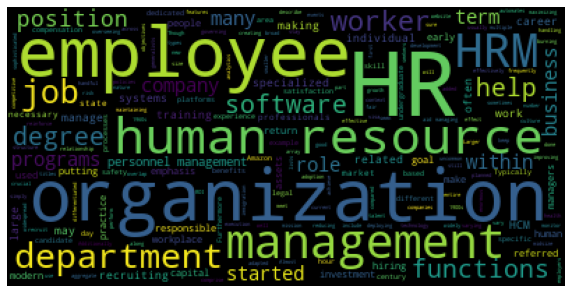

In [50]:
cloud = cloud.generate(article.cleaned_text)
plt.figure(figsize=(10,10))
plt.axis('off');
plt.imshow(cloud)

In [51]:
sentences = nltk.tokenize.sent_tokenize(article.cleaned_text)

In [52]:
sentences

["Human resource management (HRM) is the practice of recruiting, hiring, deploying and managing an organization's employees.",
 'HRM is often referred to simply as human resources (HR).',
 "A company or organization's HR department is usually responsible for creating, putting into effect and overseeing policies governing workers and the relationship of the organization with its employees.",
 'The term human resources was first used in the early 1900s, and then more widely in the 1960s, to describe the people who work for the organization, in aggregate.',
 'HRM is employee management with an emphasis on those employees as assets of the business.',
 'In this context, employees are sometimes referred to as human capital.',
 'As with other business assets, the goal is to make effective use of employees, reducing risk and maximizing return on investment (ROI).',
 'The modern HR technology term human capital management (HCM) has been used more frequently compared to the term HRM.',
 'The ter

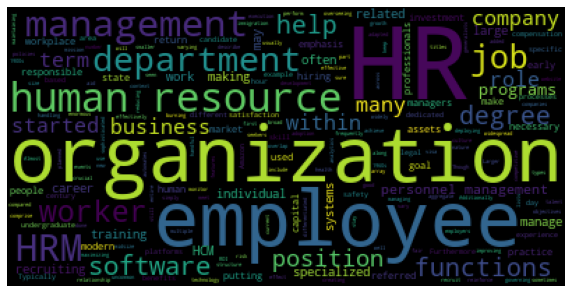

In [53]:
cloud = cloud.generate(' '.join(sentences))
plt.figure(figsize=(10,10))
plt.axis('off');
plt.imshow(cloud)

In [1]:
class Summarizer:
    def __init__(self,url):
        self.url = url
        
    
    def extract_webpage(self):
        from goose3 import Goose
        g = Goose()
        self.__article = g.extract(url = self.url)
        return self.__article.cleaned_text
    
    def website_links(self):
        try:
            return self.__article.links
        except:
            print("Please run the 'extract_webpage' method first")
            
    def webpage_summarizor_as_para(self):
        from goose3 import Goose
        from transformers import pipeline
        import spacy
        import en_core_web_sm
        import nltk
        import IPython
        from IPython.core.display import HTML
        
        g = Goose()
        self.__article1 = g.extract(url = self.url)
        summarizer = pipeline('summarization',model = 'facebook/bart-large-cnn')
        max_length = int(input("Maximum Amount of words you want:  "))
        if (len(summarizer.tokenizer.tokenize(self.__article1.cleaned_text)) < max_length):
            max_length = int(input("Max_length must not exceed {} ===> max_words:  ".format(len(summarizer.tokenizer.tokenize(self.__article2.cleaned_text)))))
        min_length = int(input("Minimum Amount of words you want:  "))
        
        #Summarizing
        
        z = summarizer(self.__article1.cleaned_text,max_length=max_length, min_length=min_length, do_sample=False)
        display(HTML(f'<h2>{self.__article1.title}</h2>'))
        display(HTML(f"""<blockquote>{z[0]['summary_text']}</blockquote>"""))
        
        
    def webpage_summarizor_as_point(self):
        from goose3 import Goose
        from transformers import pipeline
        import spacy
        import en_core_web_sm
        import nltk
        import IPython
        from IPython.core.display import HTML
        
        g = Goose()
        self.__article2 = g.extract(url = self.url)
        summarizer1 = pipeline('summarization',model = 'facebook/bart-large-cnn')
        max_length = int(input("Maximum Amount of words you want:  "))
        if (len(summarizer1.tokenizer.tokenize(self.__article2.cleaned_text)) < max_length):
            max_length = int(input("Max_length must not exceed {} ===> max_words:  ".format(len(summarizer1.tokenizer.tokenize(self.__article2.cleaned_text)))))
        min_length = int(input("Minimum Amount of words you want:  "))
        
        #Summarizing
        
        z = summarizer1(self.__article2.cleaned_text,max_length=max_length, min_length=min_length, do_sample=False)
        sentences = nltk.tokenize.sent_tokenize(z[0]['summary_text'])
        display(HTML(f'<h2>{self.__article2.title}</h2>'))
        text = ''
        for j,i in enumerate(sentences):
            text += ' '+"<strong>*</strong>"+" "+i
            text += "<br /><br />"
            
        display(HTML(f"""<blockquote>{text}</blockquote>"""))
        
        
    def word_cloud(self):
        try:
            from wordcloud import WordCloud
            import matplotlib.pyplot as plt
        
            cloud = WordCloud()
            cloud = cloud.generate(self.__article.cleaned_text)
            plt.figure(figsize=(10,10))
            plt.axis('off');
            plt.imshow(cloud)
            
        except:
            print("Please Run the 'extract_webpage' method")
            
        

In [2]:
s = Summarizer(url = 'https://searchhrsoftware.techtarget.com/definition/human-resource-management-HRM')

In [3]:
s.webpage_summarizor_as_para()

Maximum Amount of words you want:  300
Minimum Amount of words you want:  200


In [4]:
s.webpage_summarizor_as_point()

Maximum Amount of words you want:  300
Minimum Amount of words you want:  200


In [5]:
s.extract_webpage()

'Human resource management (HRM) is the practice of recruiting, hiring, deploying and managing an organization\'s employees. HRM is often referred to simply as human resources (HR). A company or organization\'s HR department is usually responsible for creating, putting into effect and overseeing policies governing workers and the relationship of the organization with its employees. The term human resources was first used in the early 1900s, and then more widely in the 1960s, to describe the people who work for the organization, in aggregate.\n\nHRM is employee management with an emphasis on those employees as assets of the business. In this context, employees are sometimes referred to as human capital. As with other business assets, the goal is to make effective use of employees, reducing risk and maximizing return on investment (ROI).\n\nThe modern HR technology term human capital management (HCM) has been used more frequently compared to the term HRM. The term HCM has had widespread 

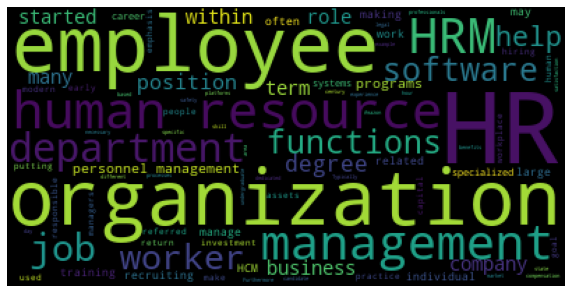

In [6]:
s.word_cloud()

In [33]:
s1 = Summarizer("https://www.managementstudyguide.com/human-resource-management.htm")

In [34]:
s1.extract_webpage()

'We often hear the term Human Resource Management, Employee Relations and Personnel Management used in the popular press as well as by Industry experts. Whenever we hear these terms, we conjure images of efficient managers busily going about their work in glitzy offices.\n\nIn this article, we look at the question \x93what is HRM ?\x94 by giving a broad overview of the topic and introducing the readers to the practice of HRM in contemporary organizations. Though as with all popular perceptions, the above imagery has some validity, the fact remains that there is much more to the field of HRM and despite popular depictions of the same, the \x93art and science\x94 of HRM is indeed complex. We have chosen the term \x93art and science\x94 as HRM is both the art of managing people by recourse to creative and innovative approaches; it is a science as well because of the precision and rigorous application of theory that is required.\n\nAs outlined above, the process of defining HRM leads us to

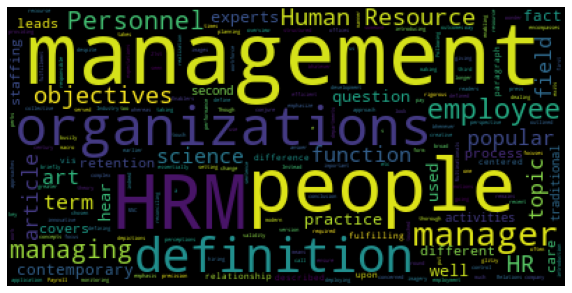

In [35]:
s1.word_cloud()

In [36]:
s1.webpage_summarizor_as_point()

Maximum Amount of words you want:  300
Minimum Amount of words you want:  150


In [37]:
s1.webpage_summarizor_as_para()

Maximum Amount of words you want:  1000
Max_length must not exceed 691 ===> max_words:  600
Minimum Amount of words you want:  400
